In [33]:
# To find ECD Control

import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')


In [34]:
import numpy as np
from qutip import *
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\mcd\\Echoed Conditional Displacements\\Two Mode\\class_description\\Old Classes')
#from DECD_paramV1 import FixedBatchOptimizer as BatchOptimizer
from DECD_paramV4 import FixedBatchOptimizer as BatchOptimizer
import matplotlib.pyplot as plt

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
#Modes Truncation
N1 = 3
N2 = 3

In [37]:
#The target oscillator state.
#Initial oscillator state.
Fock1 = 0
Fock2= 0
psi_i1 = basis(N1,Fock1) #initial state
psi_i2 = basis(N2,Fock2)
initial = tensor(basis(2,0), psi_i1, psi_i2)

#Target
Fock1 = 1
Fock2= 1
psi_t1 = basis(N1,Fock1) #target state
psi_t2 = basis(N2,Fock2)
target = tensor(basis(2, 0), psi_t1, psi_t2)

In [38]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
    'N_blocks' : 5, #circuit depth
    'N_multistart' : 4, #Batch size (number of circuit optimizations to run in parallel)
    'epochs' : 100, #number of epochs before termination
    'epoch_size' : 2, #number of adam steps per epoch
    'learning_rate' : 0.01, #adam learning rate
    'term_fid' : 0.995, #terminal fidelitiy
    'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
    'beta_scale' : 3.0, #maximum |beta| for random initialization
    'gamma_scale' : 3.0, #maximum |gamma| for random initialization
    'N_cav1': N1, #number of levels in mode 1
    'N_cav2': N2, #number of levels in mode 2
    'initial_states' : [initial], #qubit tensor oscillator, start in |g> |0>
    'target_states' : [target], #end in |e> |target>.
    #"initial_params": init_params,
    #'name' : 'Fock1 %d' % Fock1, #name for printing and saving
    'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
    }


#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

#### Filename for angles to be stored

In [39]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

None
Fixed construct needed matrices called
optimization_type: state transfer
N_multistart: 4
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 2
epochs: 100
beta_scale: 3.0
gamma_scale: 3.0
alpha1_scale: 1.0
alpha2_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: ECD_control
comment: 
initial_params: None
N_cav1: 3
N_cav2: 3
filename: ECD_control.h5

Best circuit parameters found:
betas:         [ 1.14638+0.92828j -0.84636-0.70847j -0.5274 +1.29864j  0.14727-0.77564j
 -1.96469+2.24212j]
gammas:         [ 0.27726-2.73187j  0.18685+0.01207j -0.17735+0.30441j -1.75948+2.3196j
  0.99005+0.22508j]
alphas1:        [0.+0.j]
alphas2:        [0.+0.j]
phis (deg):    [   0.      -142.06248  -66.19492  155.74144   18.98136]
etas (deg):    [89.99999 89.99999 89.99999 89.99999 89.99999]
thetas (deg):  [-88.19809 129.85944 -45.3408  -79.31165 128.61417]
Max Fidelity:  0.072289




In [40]:
#run optimizer.
opt.optimize()

Start time: 2023-06-08 14:02:02
 Epoch: 70 / 100 Max Fid: 0.996238 Avg Fid: 0.965629 Max dFid: 0.004100 Avg dFid: 0.001461 Elapsed time: 0:00:07.803969 Remaing time: 0:00:03.344558

 Optimization stopped. Term fidelity reached.

optimization_type: state transfer
N_multistart: 4
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 2
epochs: 100
beta_scale: 3.0
gamma_scale: 3.0
alpha1_scale: 1.0
alpha2_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: ECD_control
comment: 
initial_params: None
N_cav1: 3
N_cav2: 3
filename: ECD_control.h5

Best circuit parameters found:
betas:         [-0.01336+0.01838j -0.90336-0.509j   -0.61664-0.90809j  2.5029 +0.58431j
  0.42534-1.9392j ]
gammas:         [ 2.90159+0.21873j  0.51874+0.3135j  -0.53803+2.50845j -2.23512+0.22046j
 -1.53313-0.97322j]
alphas1:        [0.+0.j]
alphas2:        [0.+0.j]
phis (deg):    [  0.       92.64126 115.58566  26.01743  22.57

'2023-06-08 14:02:02'

In [41]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 4
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 2
epochs: 100
beta_scale: 3.0
gamma_scale: 3.0
alpha1_scale: 1.0
alpha2_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: ECD_control
comment: 
initial_params: None
N_cav1: 3
N_cav2: 3
filename: ECD_control.h5

Best circuit parameters found:
betas:         [-0.01336+0.01838j -0.90336-0.509j   -0.61664-0.90809j  2.5029 +0.58431j
  0.42534-1.9392j ]
gammas:         [ 2.90159+0.21873j  0.51874+0.3135j  -0.53803+2.50845j -2.23512+0.22046j
 -1.53313-0.97322j]
alphas1:        [0.+0.j]
alphas2:        [0.+0.j]
phis (deg):    [  0.       92.64126 115.58566  26.01743  22.57117]
etas (deg):    [89.99999 89.99999 89.99999 89.99999 89.99999]
thetas (deg):  [  82.79836   43.33371   89.71894 -176.96855  102.82184]
Max Fidelity:  0.996384




In [42]:
angles_filename = 'test_opt_angles.txt'
opt.save_angles(filename = angles_filename)

# Get Pulses

In [43]:
from Simulation_Classes_Two_ModeV8 import *
# Classes: ecd_pulse_single_mode to get pulses
#          , qutip_sim_single_mode to simulate on qutip

In [44]:
T1_mode1 = 2e+6 #2ms
T1_mode2 = 2e+6 #2ms

pulse_sim = ecd_pulse_two_mode(param_file = angles_filename,
                              kappa1 = 1/T1_mode1,
                              kappa2 = 1/T1_mode2)

In [45]:
pulse_sim.get_pulses()

---------------------------------------------------
final displacement is 0.022717136943355566
---------------------------------------------------
final displacement is 2.910763832377057
---------------------------------------------------
final displacement is 1.0368938656680857
---------------------------------------------------
final displacement is 0.6061136006876658
---------------------------------------------------
final displacement is 1.097667299427498
---------------------------------------------------
final displacement is 2.5655004152841037
---------------------------------------------------
final displacement is 2.5701984009029375
---------------------------------------------------
final displacement is 2.245969231474557
---------------------------------------------------
final displacement is 1.985297893165628
---------------------------------------------------
final displacement is 1.816228116869559


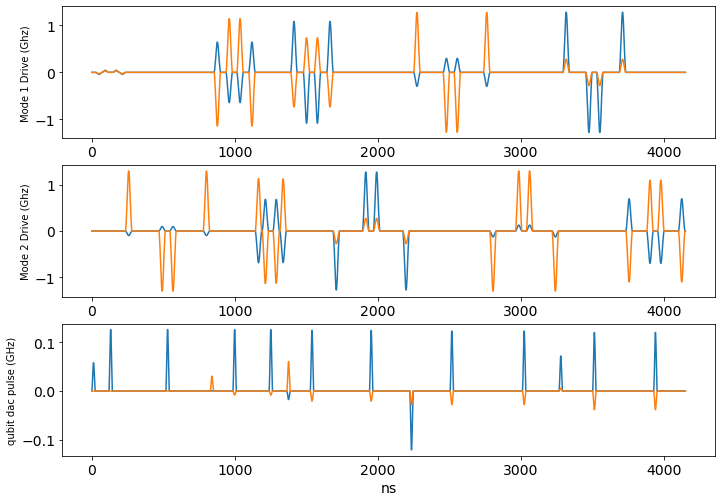

In [46]:
pulse_sim.plot_pulses()

# Qutip Simulation

In [47]:
qutip_sim  = qutip_sim_two_mode(n_q = 2, n_c1 = N1, n_c2 = N2, alpha1 = pulse_sim.alpha1, alpha2 = pulse_sim.alpha2, qubit_pulse = pulse_sim.qubit_dac_pulse_GHz)

In [48]:
# Add various terms 

# to the hamiltonian 
# qutip_sim.add_bare_qubit_mode_coupling() # chi/2 adag a sigmaz
# qutip_sim.add_mode_mode_coupling()
# qutip_sim.add_stark_shift() # chi/2 alpha^2 sigmaz

# # to the collapse operators (noise)
# qutip_sim.add_qubit_relaxation(T1 = 30e+3) # T1 in nanoseconds
# qutip_sim.add_qubit_dephasing(T1 = 30e+3, Techo = 50e+3) # T1, T2 in nanoseconds
# qutip_sim.add_cavity_relaxation(T1_mode1 = 2e+6, T1_mode2 = 2e+6) # assumes kappa correction to equation of motion in pulses
# qutip_sim.add_cavity_dephasing(T1_mode1 = 2e+6, Techo_mode1 = 3e+6, T1_mode2 = 2e+6, Techo_mode2 = 3e+6) # T1, T2 from photon blockade paper


In [49]:
qutip_sim.me_solve(initial = initial)  #initial state by default is g0

C:\Users\Eesh Gupta\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


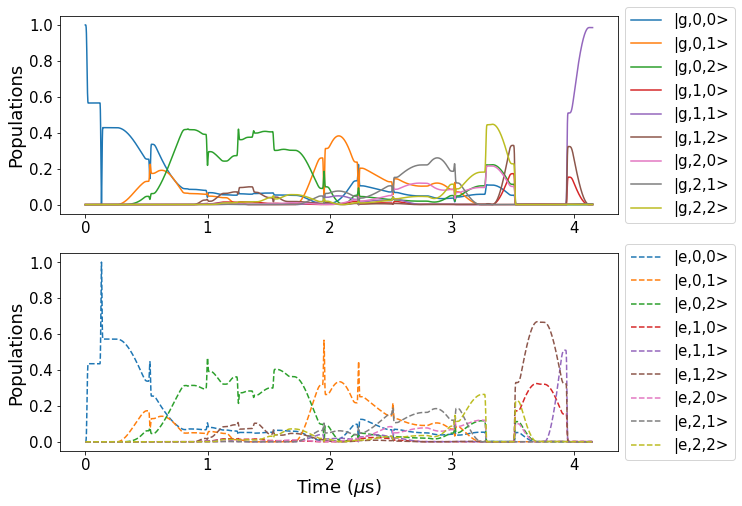

In [50]:
qutip_sim.plot_populations()

In [51]:
qutip_sim.get_fidelity(target)

0.9850322615863971